<a href="https://colab.research.google.com/github/eshankushwah/sic/blob/main/Eshan_Kushwah_Data_Analyst_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**

In [37]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# **Preparing Data for Analysis**

In [38]:
# Reading Dataset
df = pd.read_csv('data_analyst_assessment.csv')

In [39]:
total_app_open_users = df[df['Funnel Stage'] == 'App Open']['Number of Users'].sum()
total_app_open_users

np.int64(7000336)

In [40]:
df.head(5)

,Event Date,Event Time,Funnel Stage,Number of Users,Conversion Rate (%),Average Time Spent (mins),Region,Device Type,Platform
0,2025-04-01,08:00:50,App Open,107093,100.00,5.22,UK,Mobile,iOS
1,2025-04-01,08:02:43,Onboarding,94133,87.90,1.74,UK,Mobile,iOS
2,2025-04-01,08:07:07,Feature Selection,67120,71.30,2.58,UK,Mobile,iOS
3,2025-04-01,08:15:30,Subscription Started,46008,68.55,8.02,UK,Mobile,iOS
4,2025-04-01,08:25:41,Subscription Converted,35537,77.24,2.06,UK,Mobile,iOS


In [41]:
print("--- Data Information ---")
df.info()

--- Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Event Date                 350 non-null    object 
 1   Event Time                 350 non-null    object 
 2   Funnel Stage               350 non-null    object 
 3   Number of Users            350 non-null    int64  
 4   Conversion Rate (%)        350 non-null    float64
 5   Average Time Spent (mins)  350 non-null    float64
 6   Region                     350 non-null    object 
 7   Device Type                350 non-null    object 
 8   Platform                   350 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 24.7+ KB


In [42]:
# Converting Event Date from object to datetime format
df['Event Date'] = pd.to_datetime(df['Event Date'])

# Checking if dtype of Event Date changed
print("--- Data Info After Date Conversion ---")
df.info()

--- Data Info After Date Conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Event Date                 350 non-null    datetime64[ns]
 1   Event Time                 350 non-null    object        
 2   Funnel Stage               350 non-null    object        
 3   Number of Users            350 non-null    int64         
 4   Conversion Rate (%)        350 non-null    float64       
 5   Average Time Spent (mins)  350 non-null    float64       
 6   Region                     350 non-null    object        
 7   Device Type                350 non-null    object        
 8   Platform                   350 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 24.7+ KB


In [43]:
#Checking missing values
print(df.isnull().sum())

Event Date                   0
Event Time                   0
Funnel Stage                 0
Number of Users              0
Conversion Rate (%)          0
Average Time Spent (mins)    0
Region                       0
Device Type                  0
Platform                     0
dtype: int64


# **1. Funnel Analysis**

**1a. Identify the conversion rates for each funnel stage (from 'App Open' to
'Subscription Converted'). What trends or patterns do you observe across the
 days?**

In [44]:
# Set the order of the funnel stages for correct sorting
funnel_order = ['App Open', 'Onboarding', 'Feature Selection', 'Subscription Started', 'Subscription Converted']
df['Funnel Stage'] = pd.Categorical(df['Funnel Stage'], categories=funnel_order, ordered=True)

# Calculate the overall conversion rate for each stage relative to 'App Open'
total_users_per_stage = df.groupby('Funnel Stage')['Number of Users'].sum()
app_open_users = total_users_per_stage['App Open']
print(total_users_per_stage)
# Calculate the conversion rate
overall_conversion_rates = (total_users_per_stage / app_open_users) * 100

print(" Overall Funnel Conversion Rates relative to App Open ")
print(overall_conversion_rates)

Funnel Stage
App Open                  7000336
Onboarding                5973841
Feature Selection         4467770
Subscription Started      2885373
Subscription Converted    2232608
Name: Number of Users, dtype: int64
 Overall Funnel Conversion Rates relative to App Open 
Funnel Stage
App Open                  100.000000
Onboarding                 85.336490
Feature Selection          63.822222
Subscription Started       41.217636
Subscription Converted     31.892869
Name: Number of Users, dtype: float64


/tmp/ipython-input-1360366734.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/tmp/ipython-input-1432219531.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-1432219531.py:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



(0.0, 110.0)

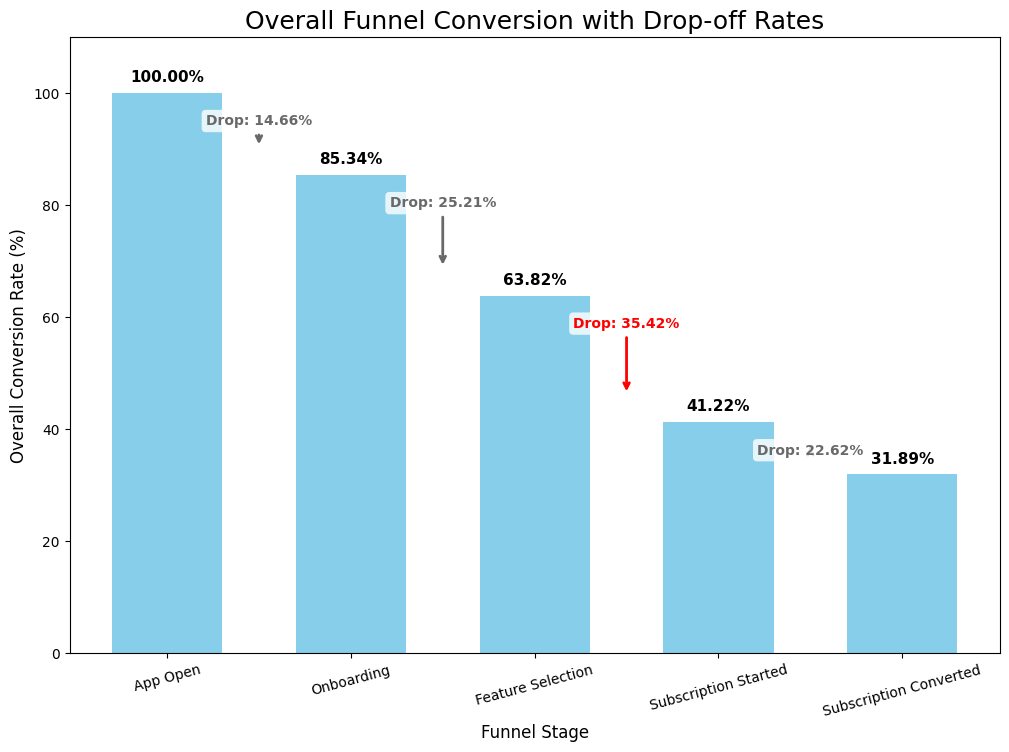

In [58]:
# The drop-off rates for our annotations
drop_off_rates = 100 - (total_users_per_stage.shift(-1) / total_users_per_stage) * 100
drop_off_rates = drop_off_rates.fillna(0)

# Creating a figure
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(overall_conversion_rates.index, overall_conversion_rates.values, color='skyblue', width=0.6)

# This loop adds the percentage labels on top
for index, value in enumerate(overall_conversion_rates):
    ax.text(index, value + 2, f'{value:.2f}%', ha='center', fontsize=11, fontweight='bold')

# This loop adds the drop-off annotations between the bars
for i in range(1, len(overall_conversion_rates)):
    previous_stage = overall_conversion_rates.index[i-1]
    drop_rate = drop_off_rates[previous_stage]
    annotation_color = 'red' if drop_rate == drop_off_rates.max() else 'dimgray'

    ax.annotate(f'Drop: {drop_rate:.2f}%',
                xy=(i - 0.5, overall_conversion_rates[i] + 5),
                xytext=(i - 0.5, overall_conversion_rates[i-1] - 5),
                arrowprops=dict(arrowstyle="->", color=annotation_color, lw=2),
                ha='center',
                va='center',
                fontsize=10,
                fontweight='bold',
                color=annotation_color,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.8))


# Add titles and labels
ax.set_title('Overall Funnel Conversion with Drop-off Rates', fontsize=18)
ax.set_ylabel('Overall Conversion Rate (%)', fontsize=12)
ax.set_xlabel('Funnel Stage', fontsize=12)
plt.xticks(rotation=15)
ax.set_ylim(0, 110)

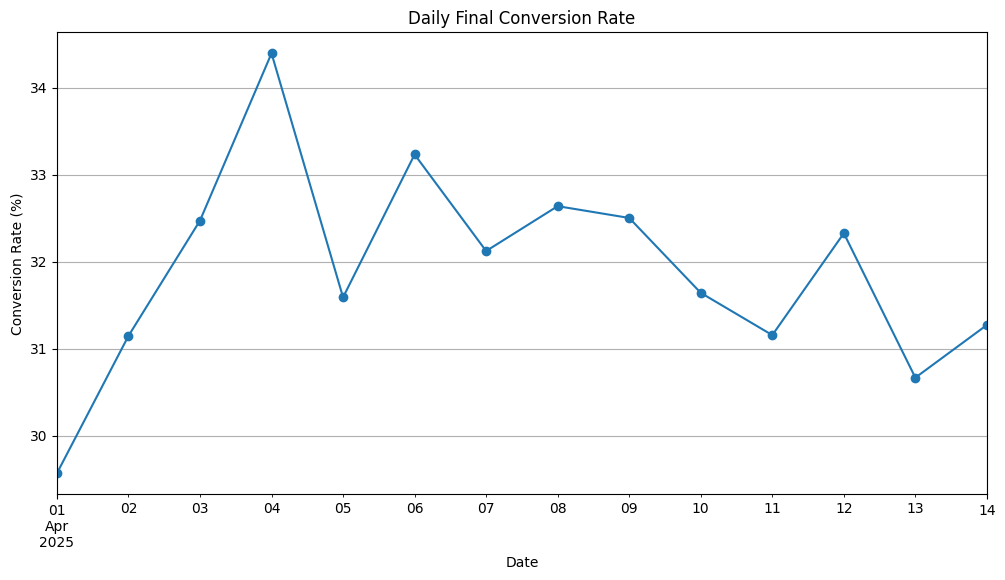

In [46]:
# Trend of Final Conversion Rate Over Time for Subscription converted
daily_conversions = df[df['Funnel Stage'] == 'Subscription Converted'].groupby('Event Date')['Number of Users'].sum()
daily_app_opens = df[df['Funnel Stage'] == 'App Open'].groupby('Event Date')['Number of Users'].sum()
daily_final_conversion_rate = (daily_conversions / daily_app_opens) * 100

plt.figure(figsize=(12, 6))
daily_final_conversion_rate.plot(kind='line', marker='o')
plt.title('Daily Final Conversion Rate')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

**1b. Identify the funnel stage with the highest drop-off rate. Suggest why this
could be happening.**

In [47]:
# Calculating the drop-off rate between consecutive stages
drop_off_rates = 100 - (total_users_per_stage.shift(-1) / total_users_per_stage) * 100
# The last stage will be NaN so we fill it with 0.
drop_off_rates = drop_off_rates.fillna(0)

print(" Drop-off Rates Between Stages ")
print(drop_off_rates)

highest_drop_off_stage = drop_off_rates.idxmax()
highest_drop_off_value = drop_off_rates.max()

print(f"\n Highest drop-off is from '{highest_drop_off_stage}' with {highest_drop_off_value:.2f}%.")

 Drop-off Rates Between Stages 
Funnel Stage
App Open                  14.663510
Onboarding                25.211100
Feature Selection         35.418050
Subscription Started      22.623245
Subscription Converted     0.000000
Name: Number of Users, dtype: float64

 Highest drop-off is from 'Feature Selection' with 35.42%.


In [48]:
# remove the last stage with 0% drop-of
drop_off_rates_to_plot = drop_off_rates[drop_off_rates > 0]
highest_value = drop_off_rates_to_plot.max()

# Create a list of colors.
colors = ['red' if v == highest_value else 'dodgerblue' for v in drop_off_rates_to_plot]

# bar chart.
fig = go.Figure(go.Bar(
    y=drop_off_rates_to_plot.index,
    x=drop_off_rates_to_plot.values,
    orientation='h',
    marker_color=colors,
    text=drop_off_rates_to_plot.apply(lambda x: f'{x:.2f}%'),
    textposition='outside'
))

# Add title
fig.update_layout(
    title_text='Drop-off Rate Between Funnel Stages',
    yaxis=dict(autorange="reversed")
)

fig.show()

**1c. Compare conversion rate trends across platforms (iOS vs Android) and device
types (Mobile vs Tablet). Which combination performs the best?**

In [49]:
pivot_data = df.pivot_table(index=['Region', 'Device Type', 'Platform'],
                            columns='Funnel Stage',
                            values='Number of Users',
                            aggfunc='sum')

# Calculate the final conversion rate
pivot_data['Final Conversion Rate (%)'] = (pivot_data['Subscription Converted'] / pivot_data['App Open']) * 100

# Sort to see the best performing combinations
best_performing = pivot_data.sort_values(by='Final Conversion Rate (%)', ascending=False)

print("Final Conversion Rate by Platform and Device ")
print(best_performing['Final Conversion Rate (%)'])

best_combo = best_performing.index[0]
best_rate = best_performing['Final Conversion Rate (%)'].iloc[0]

print(f"\n The best performing combination is {best_combo} with a rate of {best_rate:.2f}%.")

Final Conversion Rate by Platform and Device 
Region     Device Type  Platform
USA        Tablet       iOS         34.910307
India      Mobile       iOS         33.250601
USA        Mobile       Android     33.165358
Germany    Tablet       Android     32.771825
UK         Tablet       Android     32.477061
                        iOS         32.212946
India      Tablet       Android     32.124533
Australia  Tablet       Android     32.119562
                        iOS         32.068683
USA        Mobile       iOS         31.950764
UK         Mobile       Android     31.945255
India      Mobile       Android     31.830429
Germany    Mobile       iOS         31.731243
USA        Tablet       Android     31.413067
UK         Mobile       iOS         31.131472
Germany    Tablet       iOS         31.041311
           Mobile       Android     30.979600
India      Tablet       iOS         30.879870
Australia  Mobile       iOS         30.656595
                        Android     30.086038
N

/tmp/ipython-input-2309525510.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



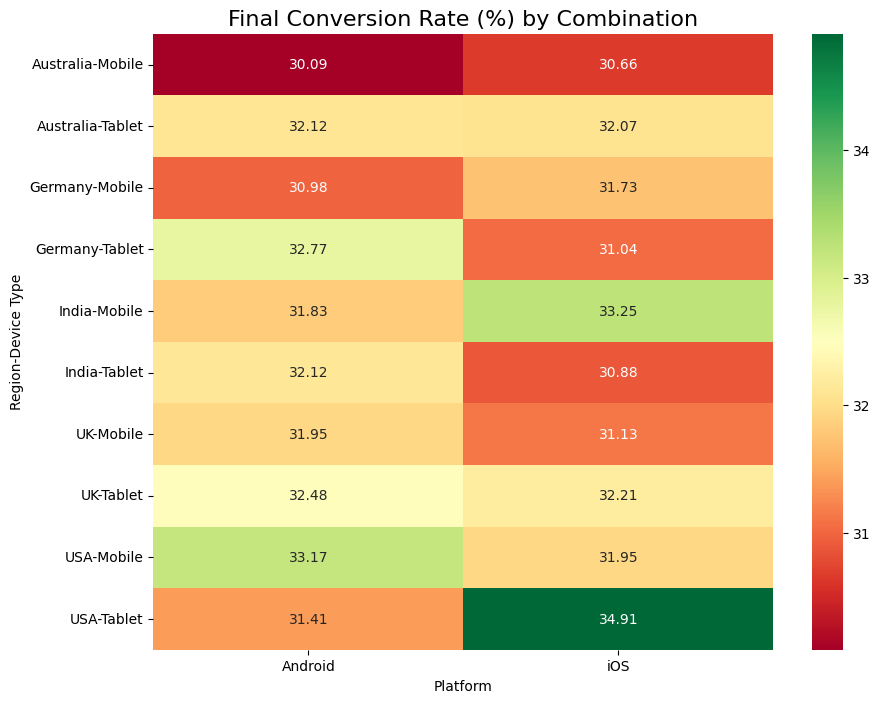

In [50]:
# Rearranging the data into a grid for the heatmap
heatmap_data = best_performing['Final Conversion Rate (%)'].unstack()

# creating plot
plt.figure(figsize=(10, 8))

# Creating heatmap using the simple RdYlGn colormap
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f',
    cmap='RdYlGn')

plt.title('Final Conversion Rate (%) by Combination', fontsize=16)
plt.show()


# **2. User Behavior Insights:**


**2a. Analyze the average time spent at each funnel stage. Are there any stages
where users tend to drop off?**


Average Time Spent at Each Funnel Stage
Funnel Stage
App Open                  5.556857
Onboarding                6.355571
Feature Selection         5.487857
Subscription Started      6.216571
Subscription Converted    6.469857
Name: Average Time Spent (mins), dtype: float64


/tmp/ipython-input-4024072585.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



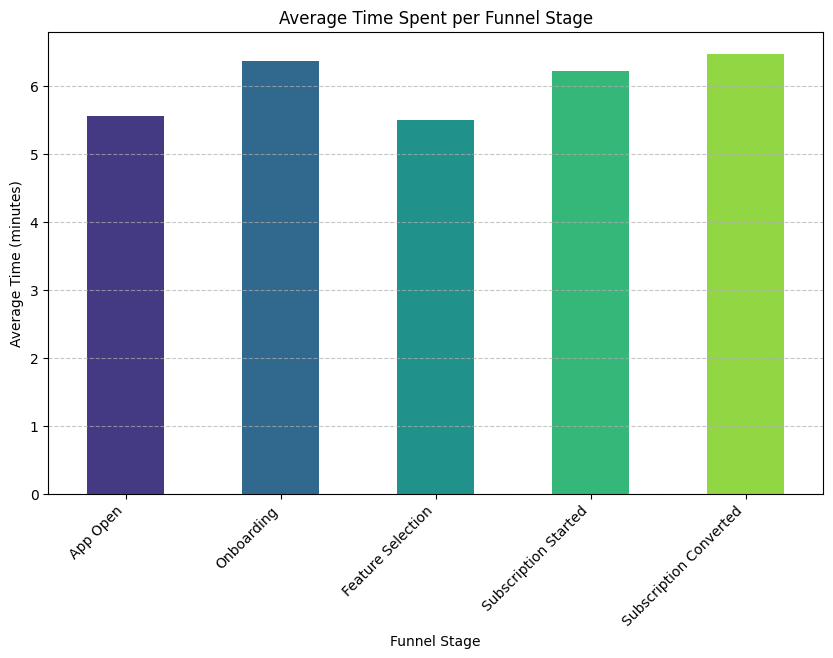

In [51]:
# Analyze the average time spent at each funnel stage
avg_time_spent = df.groupby('Funnel Stage')['Average Time Spent (mins)'].mean()

print("Average Time Spent at Each Funnel Stage")
print(avg_time_spent)

# Visualize the average time spent
plt.figure(figsize=(10, 6))
avg_time_spent.plot(kind='bar', color=sns.color_palette("viridis", len(avg_time_spent)))
plt.title('Average Time Spent per Funnel Stage')
plt.ylabel('Average Time (minutes)')
plt.xlabel('Funnel Stage')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**2b. Analyze user time spent at each funnel stage. Does more time correlate with
better conversion or indicate friction?**

Based on this data, more time does not clearly correlate with either better conversion or friction.

The average time spent at each stage is very similar, with all stages falling within a narrow range (roughly 5.5 to 6.5 minutes). There are no major outliers.

Conclusion: If there were a major friction point, we would expect to see one stage with a much longer average time, but that is not the case here. This suggests that the app's performance is consistent from a time perspective and users are not getting "stuck" on any particular page.

**2c. Based on the time data, which funnel stage needs UX improvement?**

Based only on the time data, no single funnel stage stands out as needing an urgent UX improvement for friction because the time analysis does not show a significant bottleneck or an unusually slow stage, it tells us that improving the speed or simplicity of any single page is likely not the highest priority.

This is a crucial finding. It suggests that the reason users drop off isn't because the app is difficult to use (friction), but because they aren't convinced of its value. Therefore, the focus for improvement should shift from "making it easier" to "making it more desirable." The best place to address this is the Feature Selection stage by improving the messaging and value proposition to better motivate users to subscribe.

# **3. Conclusive Analytics**

**3a. If the goal is to increase paid conversions by 20%, which funnel stage should
be optimized first and why?**

If we want to increase conversions by 20%, where should we focus our efforts for the biggest win?

The stage to optimize first is the one with the highest drop-off rate. From our analysis in 1b, this is likely the transition from Feature Selection to Subscription Started.

This is our "leakiest bucket." Even a small improvement here will save a large number of users who will then proceed down the funnel, leading to the biggest overall impact on final conversions.

In [52]:
# remove the last stage with 0% drop-of
drop_off_rates_to_plot = drop_off_rates[drop_off_rates > 0]

# Find the highest drop-off value.
highest_value = drop_off_rates_to_plot.max()

# Create a list of colors.
colors = ['red' if v == highest_value else 'dodgerblue' for v in drop_off_rates_to_plot]

# 3. Create the bar chart.
fig = go.Figure(go.Bar(
    y=drop_off_rates_to_plot.index,
    x=drop_off_rates_to_plot.values,
    orientation='h',
    marker_color=colors,
    text=drop_off_rates_to_plot.apply(lambda x: f'{x:.2f}%'),
    textposition='outside'
))

# Add title
fig.update_layout(
    title_text='Drop-off Rate Between Funnel Stages',
    yaxis=dict(autorange="reversed")
)

fig.show()

**3b. Assuming average subscription revenue is $7 per user, calculate daily revenue
and how much is lost due to drop-offs.**


In [53]:
# Average subscription revenue per user
avg_revenue_per_user = 7 # in dollars

# Calculate total users converted per day
daily_converted_users = df[df['Funnel Stage'] == 'Subscription Converted'].groupby('Event Date')['Number of Users'].sum()

# Calculate daily revenue
daily_revenue = daily_converted_users * avg_revenue_per_user

# Calculate total users who started but did not convert each day
daily_app_open_users = df[df['Funnel Stage'] == 'App Open'].groupby('Event Date')['Number of Users'].sum()
daily_dropped_users = daily_app_open_users - daily_converted_users

# Calculate lost revenue per day
daily_lost_revenue = daily_dropped_users * avg_revenue_per_user

# Combine into a summary dataframe
revenue_summary = pd.DataFrame({
    'Daily Revenue ($)': daily_revenue,
    'Lost Revenue ($)': daily_lost_revenue
})

print(" Daily Revenue Summary")
print(revenue_summary)

# Calculate the average daily lost revenue
avg_lost_revenue = revenue_summary['Lost Revenue ($)'].mean()
print(f"\n On average, the company is losing ${avg_lost_revenue:,.2f} per day due to user drop-offs.")

 Daily Revenue Summary
            Daily Revenue ($)  Lost Revenue ($)
Event Date                                     
2025-04-01            1080674           2574397
2025-04-02            1069271           2363767
2025-04-03            1139670           2369906
2025-04-04            1207248           2302489
2025-04-05            1103760           2390192
2025-04-06            1134245           2278710
2025-04-07            1100988           2326401
2025-04-08            1100974           2272193
2025-04-09            1157359           2403352
2025-04-10            1089844           2354408
2025-04-11            1136912           2512188
2025-04-12            1074409           2249079
2025-04-13            1104747           2497684
2025-04-14            1128155           2479330

 On average, the company is losing $2,383,864.00 per day due to user drop-offs.


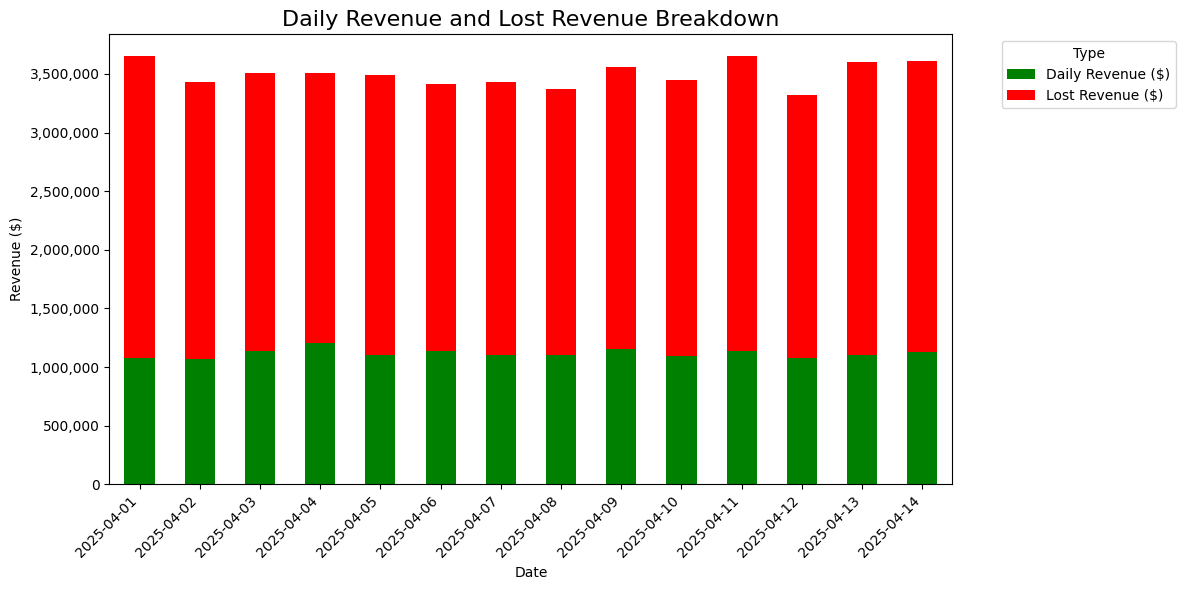

In [54]:
ax = revenue_summary.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['green', 'red']
)

# Title & labels
plt.title('Daily Revenue and Lost Revenue Breakdown', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Revenue ($)')

# Format X-axis
ax.set_xticklabels(revenue_summary.index.strftime('%Y-%m-%d'), rotation=45, ha='right')

# Format Y-axis
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


**3c. Identify any discrepancies or anomalies in the data (such as unusually high or
low conversion rates, time spent, etc.).**

/tmp/ipython-input-2214915119.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



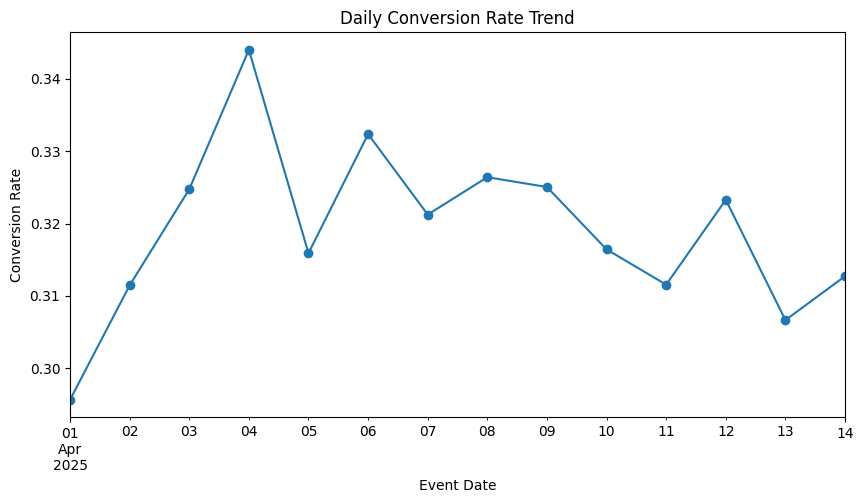

In [55]:
# Conversion rate per day
funnel_users = df.groupby(['Event Date', 'Funnel Stage'])['Number of Users'].sum().unstack()

funnel_users['Conversion Rate'] = funnel_users['Subscription Converted'] / funnel_users['App Open']
funnel_users['Conversion Rate'].plot(marker='o', figsize=(10,5), title="Daily Conversion Rate Trend")

plt.ylabel("Conversion Rate")
plt.show()

Average time spent per stage:
 Funnel Stage
App Open                  5.556857
Onboarding                6.355571
Feature Selection         5.487857
Subscription Started      6.216571
Subscription Converted    6.469857
Name: Average Time Spent (mins), dtype: float64


/tmp/ipython-input-1096348023.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



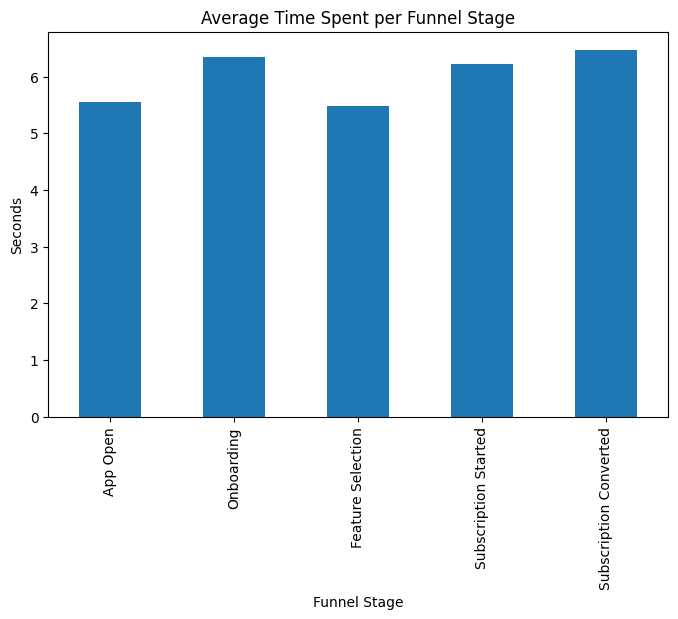

In [56]:
# Average time spent per stage
avg_time_stage = df.groupby('Funnel Stage')['Average Time Spent (mins)'].mean()
print("Average time spent per stage:\n", avg_time_stage)

avg_time_stage.plot(kind='bar', figsize=(8,5), title="Average Time Spent per Funnel Stage")
plt.ylabel("Seconds")
plt.show()


# **4. Creative Presentation:**

In [57]:
# Create the funnel chart
fig = go.Figure(go.Funnel(
    y = total_users_per_stage.index,
    x = total_users_per_stage.values,
    textposition = "inside",
    textinfo = "value+percent previous", # <<< CHANGE IS HERE
    marker = {"color": ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F"]}
))
fig.update_layout(
    title={
        'text': "Overall User Conversion Funnel",
        'x':0.5,
        'xanchor': 'center'
    }
)
fig.show()